# Scatter plot representing quality metrics

In [1]:
import pandas as pd
from pathlib import Path
import random
import yaml
import datetime
import plotly.express as px
import plotly.graph_objs as go
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter
from matplotlib import rcParams

warnings.filterwarnings('ignore')

In [2]:
with open("config.yaml", "r") as f:
    notebook_configuration = yaml.safe_load(f)
notebook_configuration

{'bgcflow_dir': '/datadrive/bgcflow'}

In [3]:
# # Write samples.csv table to config directory of qc_strepto_ncbi project
bgcflow_dir = Path(notebook_configuration["bgcflow_dir"])
project_name_1 = "qc_strepto_ncbi"
processed_dir_1 = bgcflow_dir / "data" / "processed" / project_name_1

# project_name_2 = "qc_gtdbtk"
# processed_dir_2 = bgcflow_dir / "data" / "processed" / project_name_2

# Read output tables from the processed directory
ncbi_meta_table = processed_dir_1 / "tables"/ "df_ncbi_meta.csv"
df_ncbi_meta = pd.read_csv(ncbi_meta_table, index_col= 0)

# gtdb_meta_table = processed_dir_1 / "tables"/ "df_gtdb_meta_curated.csv"
# df_gtdb_meta = pd.read_csv(gtdb_meta_table, index_col= 0)

# seqfu_meta_table_1 = processed_dir_1 / "tables"/ "df_seqfu_stats.csv"
# df_seqfu_meta_1 = pd.read_csv(seqfu_meta_table_1, index_col= 0)

# seqfu_meta_table_2 = processed_dir_2 / "tables"/ "df_seqfu_stats.csv"
# df_seqfu_meta_2 = pd.read_csv(seqfu_meta_table_2, index_col= 0)

# # Filter out indices that don't exist in df_seqfu_meta_2 index
# genomes_to_remove = [idx for idx in df_seqfu_meta_1.index if idx in df_seqfu_meta_2.index]

# # Drop the filtered indices from df_seqfu_meta_2 as they are already present in df_sedf_seqfu_meta_1
# df_seqfu_meta_NBC = df_seqfu_meta_2.drop(genomes_to_remove)

# # Combine two dataframes
# df_seqfu_meta = pd.concat([df_seqfu_meta_1, df_seqfu_meta_NBC])

# checkm_meta_table_2 = processed_dir_2 / "tables"/ "df_checkm_stats.csv"
# df_checkm_meta_2 = pd.read_csv(checkm_meta_table_2, index_col= 0)

In [4]:
# df = pd.DataFrame(index=df_seqfu_meta.index, columns=["genome_id","source", "genus", "species","quality", "completeness", "contamination", "N50", "contigs", "genome_len"])
# df["genome_id"] = df.index
# # df = df.drop(df_gtdb_meta[df_gtdb_meta.detail != "Genome found"].index)

# for genome_id in df.index:
#     # Define genus
#     if genome_id in df_gtdb_meta.index:
#         genus = df_gtdb_meta.loc[genome_id, "Genus"]
#         species = df_gtdb_meta.loc[genome_id, "Species"]
#         df.loc[genome_id, "species"] = species
#         if genus == "g__Streptomyces":
#             df.loc[genome_id, "genus"] = "Streptomyces"
#         else:
#             df.loc[genome_id, "genus"] = "Other"
#     else:
#         print(genome_id, "GTDB taxonomy not found!")
        
#     # Define quality levels
#     if genome_id in df_ncbi_meta.index:
#         df.loc[genome_id, "source"] = "NCBI"
#         assembly_level = df_ncbi_meta.loc[genome_id, "assembly_level"]
#     else:
#         df.loc[genome_id, "source"] = "NBC"
#         assembly_level = "Complete Genome"
        
#     if assembly_level in ["Complete Genome", "Chromosome"]:
#         df.loc[genome_id, "quality"] = "HQ"
#     else:
#         contigs = df_seqfu_meta.loc[genome_id, "Count"]
#         N50 = df_seqfu_meta.loc[genome_id, "N50"]
#         if contigs <= 100 and  N50 >= 100000:
#             df.loc[genome_id, "quality"] = "MQ"
#         else:
#             df.loc[genome_id, "quality"] = "LQ"
            
#     # Define checkM metrics of completeness and contamination
#     if genome_id in df_checkm_meta_2.index:
#         df.loc[genome_id, 'completeness'] = df_checkm_meta_2.loc[genome_id, "Completeness"]
#         df.loc[genome_id, 'contamination'] = df_checkm_meta_2.loc[genome_id, "Contamination"]
#     else:
#         df.loc[genome_id, 'completeness'] = df_gtdb_meta.loc[genome_id, "checkm_completeness"]
#         df.loc[genome_id, 'contamination'] = df_gtdb_meta.loc[genome_id, "checkm_contamination"]

#     # Define seqfu metrics of N50 and Contigs
#     df.loc[genome_id, 'N50'] = df_seqfu_meta.loc[genome_id, "N50"]
#     df.loc[genome_id, 'contigs'] = df_seqfu_meta.loc[genome_id, "Count"]
#     df.loc[genome_id, 'genome_len'] = df_seqfu_meta.loc[genome_id, "Total"]
# df_stats = df.copy()

In [5]:
bgcflow_dir = Path(notebook_configuration["bgcflow_dir"])
project_name_1 = "qc_strepto_ncbi"
processed_dir_1 = bgcflow_dir / "data" / "processed" / project_name_1

# Read output tables from the processed directory
filter_table = processed_dir_1 / "tables"/ "df_filters.csv"
df_filters = pd.read_csv(filter_table, index_col= 0)

In [6]:
df = df_filters[df_filters.genus == "Streptomyces"]

In [17]:
for genome_id in df.index:
    source_data = df.loc[genome_id, "source"]
    if source_data == "NCBI":
        df.loc[genome_id, "source_plot"] = "NCBI"
    else:
        df.loc[genome_id, "source_plot"] = "NBC"

In [11]:
# Define colors for each quality
color_discrete_map = {
    'LQ': '#E69F00',  # Orange
    'MQ': '#56B4E9',  # Sky Blue
    'HQ': '#009E73',  # Bluish Green
    # 'Unrelated': '#F0E442',  # Yellow
}

symbol_map = {"NBC": "circle", "NCBI": "cross"}

fig = px.scatter(df, x='completeness', y='contamination',
                 color='quality', symbol='source_plot',
                 log_x=True, log_y=True,
                 color_discrete_map=color_discrete_map, 
                 symbol_map=symbol_map,
                 labels={
                     "N50": "N50",
                     "contigs": "Contigs",
                     "quality": "Quality"
                 },
                 hover_data=df.columns,
                 )

fig.update_traces(marker=dict(size=7, opacity=0.5))  # Update size and opacity

fig.update_layout(
    autosize=False,
    width=600,
    height=400,
    title=dict(
        text='CheckM assembly quality metric',
        y=0.95,
        x=0.5,
        xanchor='center',
        yanchor='top'
    )
)

fig.add_shape(
    type="line", 
    x0=90, y0=0, x1=90, y1=1,  # Vertical line at x=90
    yref="paper",              # Using paper reference ensures line covers the entire y range
    line=dict(color="Grey", width=1.5, dash="dash"),
)

fig.add_shape(
    type="line", 
    x0=0, y0=5, x1=1, y1=5,  # Horizontal line at y=5
    xref="paper",             # Using paper reference ensures line covers the entire x range
    line=dict(color="Grey", width=1.5, dash="dash"),
)

# Save as SVG
fig.write_image("assets/figures/Figure_1/d.svg")

# Save as PNG
fig.write_image("assets/figures/Figure_1/d.png")

fig.show()

In [12]:
# df_stats_strepto = df_stats[df_stats.genus=="Streptomyces"]
# df_checkm_filtered = df_stats_strepto[(df_stats_strepto.completeness > 90) & (df_stats_strepto.contamination < 5)]

# # Define colors for each quality
# df = df_checkm_filtered.copy()
# color_discrete_map = {
#     'LQ': '#E69F00',  # Orange
#     'MQ': '#56B4E9',  # Sky Blue
#     'HQ': '#009E73',  # Bluish Green
#     # 'Unrelated': '#F0E442',  # Yellow
# }

# symbol_map = {"NBC": "circle", "NCBI": "cross"}

# fig = px.scatter(df, x='completeness', y='contamination',
#                  color='quality',
#                  symbol='source',
#                  color_discrete_map=color_discrete_map, 
#                  symbol_map=symbol_map,
#                  labels={
#                      "N50": "N50",
#                      "contigs": "Contigs",
#                      "quality": "Quality"
#                  },
#                  hover_data=df.columns,
#                  )

# fig.update_traces(marker=dict(size=7, opacity=0.5))  # Update size and opacity

# fig.update_layout(
#     autosize=False,
#     width=600,
#     height=400,
#     title=dict(
#         text='CheckM assembly quality metric',
#         y=0.95,
#         x=0.5,
#         xanchor='center',
#         yanchor='top'
#     )
# )

# # Save as SVG
# fig.write_image("assets/figures/Figure_1/d.svg")

# # Save as PNG
# fig.write_image("assets/figures/Figure_1/d.png")

# fig.show()

In [13]:
# df_stats_strepto = df_stats[df_stats.genus=="Streptomyces"]
# df_checkm_filtered = df_stats_strepto[(df_stats_strepto.completeness > 90) & (df_stats_strepto.contamination < 5)]

# # Define colors for each quality
# df = df_stats_strepto.copy()
# color_discrete_map = {
#     'LQ': '#E69F00',  # Orange
#     'MQ': '#56B4E9',  # Sky Blue
#     'HQ': '#009E73',  # Bluish Green
#     # 'Unrelated': '#F0E442',  # Yellow
# }

# symbol_map = {"NBC": "circle", "NCBI": "cross"}

# fig = px.scatter(df, x='completeness', y='contamination',
#                  color='quality',
#                  symbol='source',
#                  color_discrete_map=color_discrete_map, 
#                  symbol_map=symbol_map,
#                  labels={
#                      "N50": "N50",
#                      "contigs": "Contigs",
#                      "quality": "Quality"
#                  },
#                  hover_data=df.columns,
#                  )

# fig.update_traces(marker=dict(size=7, opacity=0.5))  # Update size and opacity

# fig.update_layout(
#     autosize=False,
#     width=600,
#     height=400,
#     title=dict(
#         text='CheckM assembly quality metric',
#         y=0.95,
#         x=0.5,
#         xanchor='center',
#         yanchor='top'
#     )
# )

# # Save as SVG
# fig.write_image("assets/figures/Figure_1/d.svg")

# # Save as PNG
# fig.write_image("assets/figures/Figure_1/d.png")

# fig.show()

In [16]:
# Define colors for each quality
color_discrete_map = {
    'LQ': '#E69F00',  # Orange
    'MQ': '#56B4E9',  # Sky Blue
    'HQ': '#009E73',  # Bluish Green
    # 'Unrelated': '#F0E442',  # Yellow
}

symbol_map = {"NBC": "circle", "NCBI": "cross"}

# Add small random noise to 'completeness' and 'contamination' for jitter effect
jitter = 0.04  # adjust this to control the amount of jitter
df['contigs_jittered'] = df['contigs'] + np.random.uniform(-jitter, jitter, size=len(df))
# df['N50_jittered'] = df['N50'] + np.random.uniform(-jitter, jitter, size=len(df))

fig = px.scatter(df, x='contigs_jittered', y='N50',
                 log_x=True, log_y=True,
                 color='quality',
                 symbol='source_plot',
                 color_discrete_map=color_discrete_map, 
                 symbol_map=symbol_map,
                 labels={
                     "N50": "N50",
                     "contigs_jittered": "Contigs",
                     "quality": "Quality"
                 },
                 hover_data=df.columns,
                 )

fig.update_traces(marker=dict(size=7, opacity=0.5))  # Update size and opacity

fig.update_layout(
    autosize=False,
    width=600,
    height=400,
    title=dict(
        text='N50 vs number of contigs',
        y=0.95,
        x=0.5,
        xanchor='center',
        yanchor='top'
    )
)

fig.add_shape(
    type="line", 
    x0=100, y0=0, x1=100, y1=1,  # Vertical line at x=90
    yref="paper",              # Using paper reference ensures line covers the entire y range
    line=dict(color="Grey", width=1.5, dash="dash"),
)

fig.add_shape(
    type="line", 
    x0=0, y0=100000, x1=1, y1=100000,  # Horizontal line at y=5
    xref="paper",             # Using paper reference ensures line covers the entire x range
    line=dict(color="Grey", width=1.5, dash="dash"),
)

# Save as SVG
fig.write_image("assets/figures/Figure_1/e.svg")

# Save as PNG
fig.write_image("assets/figures/Figure_1/e.png")

fig.show()

## Plot GC vs genome len plot with Phylogroup annotations

In [18]:
df = df_filters[df_filters.genus == "Streptomyces"]
df = df[df.quality.isin(["MQ", "HQ"])]
df_phylogroups = pd.read_csv("assets/tables/df_mash_clusters_main_reduced.csv", index_col=0)

In [19]:
# df = df.loc[df_phylogroups.index,:]
df["Cluster"] = 0
df.loc[df_phylogroups.index, "Cluster"] = df_phylogroups.loc[df_phylogroups.index, "Cluster"]
df["Cluster_Color"] = "#808080"
df.loc[df_phylogroups.index, "Cluster_Color"] = df_phylogroups.loc[df_phylogroups.index, "Cluster_Color"]
df["GC_content"] = df["gc"] * 100

In [20]:
cluster_list = sorted(df.Cluster.unique())
# Define the colors for 15 detected clusters
color_set_15 = ["#808080", "#e6194b", "#3cb44b", "#ffe119", "#0082c8", "#f58231", "#911eb4", "#46f0f0", "#f032e6", "#d2f53c", "#fabebe", "#008080", "#e6beff", "#aa6e28", "#fffac8", "#800000"]
cluster_color_dict = dict(zip(cluster_list, color_set_15[:len(cluster_list)]))

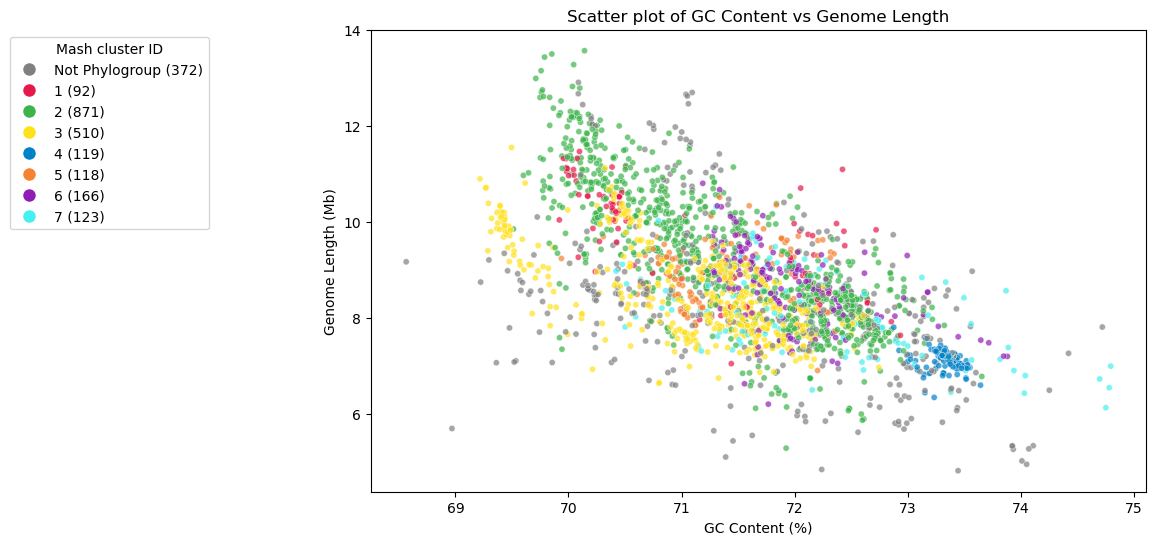

In [17]:
plt.figure(figsize=(10, 6))  # Set figure size

# Using seaborn's scatterplot function with hue for the color differentiation
scatter_plot = sns.scatterplot(x='GC_content', y='genome_len', hue='Cluster', 
                               palette=cluster_color_dict, data=df, alpha=0.7, s=20)

plt.ylabel('Genome Length (Mb)')
plt.xlabel('GC Content (%)')
plt.title('Scatter plot of GC Content vs Genome Length')

# Define the formatter function
def millions(x, pos):
    return '%1.0f' % (x * 1e-6)

formatter = ticker.FuncFormatter(millions)

# Set the formatter for the y-axis
plt.gca().yaxis.set_major_formatter(formatter)

# Create a color legend with unique cluster colors
color_legend = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cluster_color_dict[cluster],
                           markersize=10) for cluster in sorted(cluster_list)]

cluster_sizes = df.Cluster.value_counts()
labels = [f"{cluster} ({cluster_sizes[cluster]})" for cluster in sorted(cluster_list)]
labels[0] = f"Not Phylogroup ({cluster_sizes[0]})"
# Add color legend
plt.legend(color_legend, labels, title='Mash cluster ID', bbox_to_anchor=(-0.2, 1))
# plt.savefig("assets/figures/Figure_1/gc_genome.png", bbox_inches="tight")
# plt.savefig("assets/figures/Figure_1/gc_genome.svg", bbox_inches="tight")
plt.show()

# Get genome characteristics overview

In [21]:
project_name_2 = "mq_strepto"
processed_dir_2 = bgcflow_dir / "data" / "processed" / project_name_2

antismash_table = processed_dir_2 / "tables" / "df_antismash_7.0.0_summary.csv"
df_antismash = pd.read_csv(antismash_table, index_col=0, low_memory=False)

bgc_table = processed_dir_2 / "tables" / "df_regions_antismash_cat_7.0.0.csv"
df_bgcs = pd.read_csv(bgc_table, index_col=0, low_memory=False)

df_hq = df[df.quality == "HQ"]
df_antismash_hq = df_antismash.loc[df_hq.index,:]
df["bgcs_count"] = df_antismash.bgcs_count

In [22]:
print("Minimum genome length:", df.genome_len.min())
print("Maximum genome length:", df.genome_len.max())
print("Median genome length:", df.genome_len.median())

print("Minimum GC content:", df.GC_content.min())
print("Maximum GC content:", df.GC_content.max())
print("Median GC content:", df.GC_content.median())

print("Minimum BGCs:", df_antismash_hq.bgcs_count.min())
print("Maximum BGCs:", df_antismash_hq.bgcs_count.max())
print("Median BGCs:", df_antismash_hq.bgcs_count.median())

print("Total BGCs:", df_antismash.bgcs_count.sum())
print("Total BGCs on contig edge:", df_antismash.bgcs_on_contig_edge.sum())

Minimum genome length: 4811356
Maximum genome length: 13572980
Median genome length: 8521284.0
Minimum GC content: 68.56382711875497
Maximum GC content: 74.7973093648443
Median GC content: 71.57274704483
Minimum BGCs: 11.0
Maximum BGCs: 56.0
Median BGCs: 29.0
Total BGCs: 70561.0
Total BGCs on contig edge: 6524.0


In [23]:
top_bgc_types = df_antismash.iloc[:,10:].sum().sort_values(ascending=False)[:50]
# top_bgc_types

In [8]:
# for bgc_type in top_bgc_types.index:
#     print("Median BGCs:", df_antismash_hq[bgc_type].median())

In [9]:
# df_bgcs_known = df_bgcs[(df_bgcs.similarity <= 0.8) & (df_bgcs.similarity > 0.6)]
# df_bgcs_known.most_similar_known_cluster_description.value_counts()[:10]

In [24]:
df_bgcs_known = df_bgcs[df_bgcs.similarity > 0.8]
df["known_bgcs"] = df_bgcs_known.genome_id.value_counts()
df["known_bgcs_fraction"] = df["known_bgcs"] / df["bgcs_count"]

In [25]:
df["hq_bgcs_count"] = 0
df.loc[df_hq.index, "hq_bgcs_count"] = df.loc[df_hq.index, "bgcs_count"]

In [26]:
print("Minimum known BGCs:", df.known_bgcs_fraction.min())
print("Maximum known BGCs:", df.known_bgcs_fraction.max())
print("Median known BGCs:", df.known_bgcs_fraction.mean())

Minimum known BGCs: 0.043478260869565216
Maximum known BGCs: 0.7
Median known BGCs: 0.31000122740393915


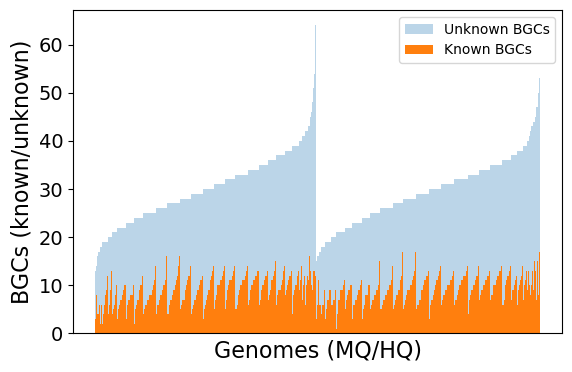

In [58]:
df = df.sort_values(by=["hq_bgcs_count", "bgcs_count", "known_bgcs"])

# # Set global font sizes
# rcParams.update({'font.size': 16})  # Adjust the number to your preferred font size
# rcParams.update({'xtick.labelsize': 14})  # X tick label font size
# rcParams.update({'ytick.labelsize': 14})  # Y tick label font size

fig, ax = plt.subplots(figsize=(6, 4))  # Adjust the figure size as needed

# First, plot the total bgcs_count with colors from cluster_color
bars = ax.bar(df.index, df['bgcs_count'], label='Unknown BGCs', alpha=0.3, width=1, align='edge')

# Now, plot the known_bgcs on top (it will naturally stack at the bottom)
ax.bar(df.index, df['known_bgcs'], label='Known BGCs', width=1, align='edge')

ax.set_ylabel('BGCs (known/unknown)', fontsize=16)  # Set specific font size for y-axis label
ax.set_xlabel('Genomes (MQ/HQ)', fontsize=16)  # Set specific font size for x-axis label
# ax.set_title('BGCs Count by Genome ID', fontsize=16)  # Set specific font size for title
ax.legend()

# Hide xticks
ax.set_xticks([])

plt.tight_layout()

plt.savefig("assets/figures/Figure_1/bgcs_count_per_genome.png", bbox_inches="tight")
plt.savefig("assets/figures/Figure_1/bgcs_count_per_genome.svg", bbox_inches="tight")

plt.show()  # Display the plot

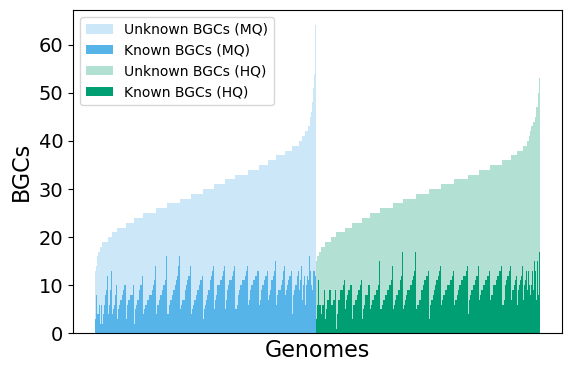

In [75]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib import rcParams

# Set global font sizes
rcParams.update({'font.size': 16})
rcParams.update({'xtick.labelsize': 14})
rcParams.update({'ytick.labelsize': 14})

# Define colors for each quality
quality_colors = {
    'MQ': '#56B4E9',
    'HQ': '#009E73',
}

# Filter the DataFrame by quality
df_mq = df[df['quality'] == 'MQ']
df_hq = df[df['quality'] == 'HQ']

fig, ax = plt.subplots(figsize=(6, 4))

# Plot Unknown BGCs (MQ)
bars_mq_unknown = ax.bar(df_mq.index, df_mq['bgcs_count'], label='Unknown BGCs (MQ)', alpha=0.3, width=1, color='#56B4E9')

# Plot Known BGCs (MQ)
bars_mq_known = ax.bar(df_mq.index, df_mq['known_bgcs'], label='Known BGCs (MQ)', width=1, color='#56B4E9')

# Plot Unknown BGCs (HQ)
bars_hq_unknown = ax.bar(df_hq.index, df_hq['bgcs_count'], label='Unknown BGCs (HQ)', alpha=0.3, width=1, color='#009E73')

# Plot Known BGCs (HQ)
bars_hq_known = ax.bar(df_hq.index, df_hq['known_bgcs'], label='Known BGCs (HQ)', width=1, color='#009E73')

# Hide xticks
ax.set_xticks([])

# Set labels with specific font sizes
ax.set_ylabel('BGCs', fontsize=16)
ax.set_xlabel('Genomes', fontsize=16)

# Create a legend
ax.legend(fontsize=10)


plt.tight_layout()

plt.savefig("assets/figures/Figure_1/bgcs_count_per_genome.png", bbox_inches="tight")
plt.savefig("assets/figures/Figure_1/bgcs_count_per_genome.svg", bbox_inches="tight")

plt.show()  # Display the plot

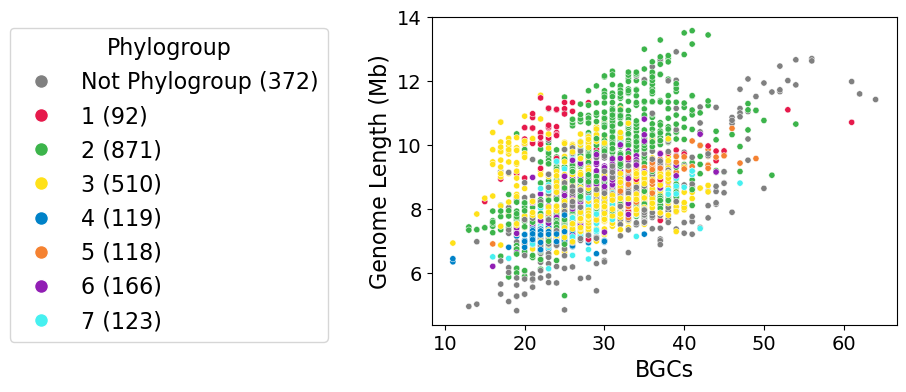

In [72]:

# Set global font sizes
rcParams.update({'font.size': 16})  # Adjust the number to your preferred font size
# rcParams.update({'axes.titlesize': 14})  # Title font size
# rcParams.update({'axes.labelsize': 12})  # Axis labels font size
# rcParams.update({'legend.fontsize': 10})  # Legend font size
rcParams.update({'xtick.labelsize': 14})  # X tick label font size
rcParams.update({'ytick.labelsize': 14})  # Y tick label font size

fig, ax = plt.subplots(figsize=(6, 4))  # Adjust the figure size as needed

# Using seaborn's scatterplot function with hue for the color differentiation
scatter_plot = sns.scatterplot(x='bgcs_count', y='genome_len', hue='Cluster', 
                               palette=cluster_color_dict, data=df, s=20)

plt.ylabel('Genome Length (Mb)')
plt.xlabel('BGCs')
# plt.title('Scatter plot of BGCs vs Genome Length')

# Define the formatter function
def millions(x, pos):
    return '%1.0f' % (x * 1e-6)

formatter = ticker.FuncFormatter(millions)

# Set the formatter for the y-axis
plt.gca().yaxis.set_major_formatter(formatter)

# Create a color legend with unique cluster colors
color_legend = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cluster_color_dict[cluster],
                           markersize=10) for cluster in sorted(cluster_list)]

cluster_sizes = df.Cluster.value_counts()
labels = [f"{cluster} ({cluster_sizes[cluster]})" for cluster in sorted(cluster_list)]
labels[0] = f"Not Phylogroup ({cluster_sizes[0]})"

# Add color legend
plt.legend(color_legend, labels, title='Phylogroup', bbox_to_anchor=(-0.2, 1))

# plt.savefig("assets/figures/Figure_1/bgc_genome_len.png", bbox_inches="tight")
# plt.savefig("assets/figures/Figure_1/bgc_genome_len.svg", bbox_inches="tight")
plt.show()

# Plot known cluster per type

In [28]:
known_cutoff_1 = 0.5
known_cutoff_2 = 0.8

In [29]:
df_bgcs_known = df_bgcs[df_bgcs.similarity > known_cutoff_2]
df_bgcs_similar = df_bgcs[df_bgcs.similarity > known_cutoff_1]

df_bgc_types = pd.DataFrame(columns=["Total", "Known", "Similar", "MIBIG"])
mibig_count_dict = dict()
for bgc_id in df_bgcs.index:
    bgc_type = df_bgcs.loc[bgc_id, "product"]
    bgc_list = bgc_type[1:-1].split(",")
    bgc_list_updated = []
    for bgc_type_cntr in bgc_list:
        bgc_list_updated.append(bgc_type_cntr.strip()[1:-1])
    bgc_type_updated = ".".join(sorted(bgc_list_updated))

    if bgc_type_updated not in df_bgc_types.index:
        df_bgc_types.loc[bgc_type_updated, :] = 0
        mibig_count_dict[bgc_type_updated] = []
        df_bgc_types.loc[bgc_type_updated, "Total"] = 1
        if bgc_id in df_bgcs_known.index:
            df_bgc_types.loc[bgc_type_updated, "Known"] = df_bgc_types.loc[bgc_type_updated, "Known"] + 1
            mibig_id = df_bgcs_known.loc[bgc_id, "most_similar_known_cluster_id"]
            mibig_count_dict[bgc_type_updated].append(mibig_id)
        if bgc_id in df_bgcs_similar.index:
            df_bgc_types.loc[bgc_type_updated, "Similar"] = df_bgc_types.loc[bgc_type_updated, "Similar"] + 1
    else:
        df_bgc_types.loc[bgc_type_updated, "Total"] = df_bgc_types.loc[bgc_type_updated, "Total"] + 1
        if bgc_id in df_bgcs_known.index:
            df_bgc_types.loc[bgc_type_updated, "Known"] = df_bgc_types.loc[bgc_type_updated, "Known"] + 1
            mibig_id = df_bgcs_known.loc[bgc_id, "most_similar_known_cluster_id"]
            if mibig_id not in mibig_count_dict[bgc_type_updated]:
                mibig_count_dict[bgc_type_updated].append(mibig_id)
        if bgc_id in df_bgcs_similar.index:
            df_bgc_types.loc[bgc_type_updated, "Similar"] = df_bgc_types.loc[bgc_type_updated, "Similar"] + 1
            
df_bgc_types["MIBIG"] = [len(mibig_count_dict[bgc_type]) for bgc_type in df_bgc_types.index]
df_bgc_types.sort_values(by="Total", ascending=False, inplace=True)
df = df_bgc_types[:20]
mibig_other_list = []
for bgc_type in mibig_count_dict.keys():
    if bgc_type not in df.index:
        mibig_other_list = mibig_other_list + mibig_count_dict[bgc_type]
df.loc["Other_combined", :] = df_bgc_types[20:].sum()
df.loc["Other_combined", "MIBIG"] = len(set(mibig_other_list))
df["Known_percent"] = df.Known*100 / df.Total
df["Similar_percent"] = (df.Similar - df.Known)*100 / df.Total
df.sort_values(by=["Total"], ascending=True, inplace=True)

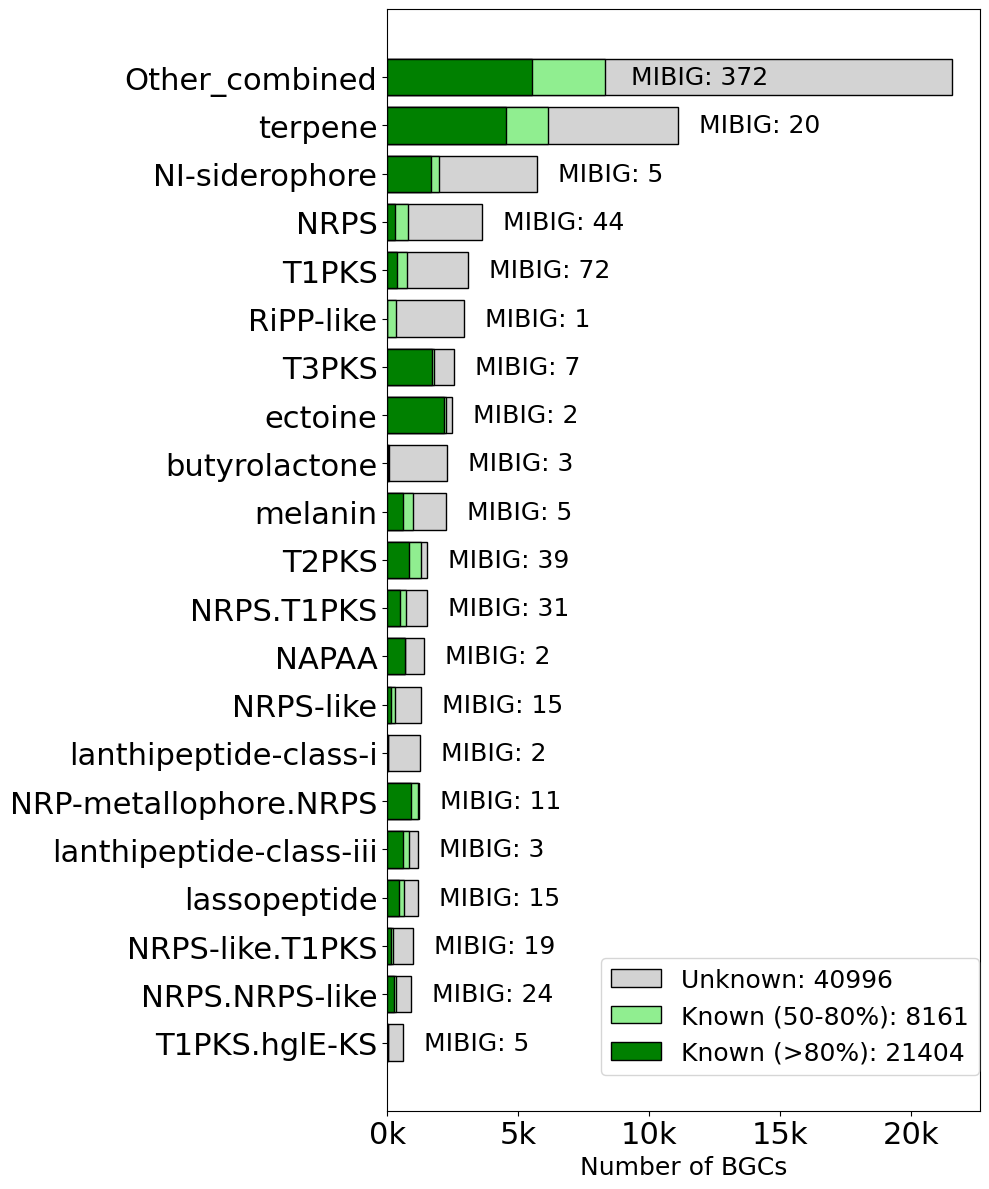

In [32]:
# Font sizes
title_fontsize = 18
label_fontsize = 22
annotation_fontsize = 18
percent_fontsize = 18

# Plot
fig, ax = plt.subplots(figsize=(10, 12))

# Plotting the total_bgcs as background bars
bars_total = ax.barh(df.index, df['Total'], color='lightgrey', edgecolor='black', label='Total BGCs', height=0.75)

# Plotting known_bgcs on top of total
bars_similar = ax.barh(df.index, df['Similar'], color='lightgreen', edgecolor='black', label='Similar BGCs', height=0.75)

# Plotting known_bgcs on top of total
bars_known = ax.barh(df.index, df['Known'], color='green', edgecolor='black', label='Known BGCs', height=0.75)

# Annotating bars
for i, (bar_total, bars_similar, bars_known) in enumerate(zip(bars_total, bars_similar, bars_known)):
    width_total = bar_total.get_width()
    width_similar = bars_similar.get_width()
    width_known = bars_known.get_width()
    
    if width_total > 15000:
        # ax.text(width_known + 100, bar_total.get_y() + bar_total.get_height()/2,  
        #         f'{df["Known_percent"].iloc[i]:.1f}%', va='center', ha='left', color="Blue", fontweight='bold', fontsize=percent_fontsize) 
        # ax.text(width_known + 3500, bar_total.get_y() + bar_total.get_height()/2,  
        #         f'({df["Similar_percent"].iloc[i]:.1f}%)', va='center', ha='left', color="Green", fontweight='bold', fontsize=percent_fontsize)
        ax.text(width_similar + 1000, bar_total.get_y() + bar_total.get_height()/2, 
                f'MIBIG: {int(df["MIBIG"].iloc[i])}', va='center', ha='left', fontsize=annotation_fontsize) 
    else:
        # ax.text(width_total + 100, bar_total.get_y() + bar_total.get_height()/2,  
        #         f'{df["Known_percent"].iloc[i]:.1f}%', va='center', ha='left', fontweight='bold', color="Blue", fontsize=percent_fontsize)
        # ax.text(width_total + 3500, bar_total.get_y() + bar_total.get_height()/2,  
        #         f'({df["Similar_percent"].iloc[i]:.1f}%)', va='center', ha='left', color="Green", fontweight='bold', fontsize=percent_fontsize)
        ax.text(width_total + 800, bar_total.get_y() + bar_total.get_height()/2, 
                f'MIBIG: {int(df["MIBIG"].iloc[i])}', va='center', ha='left', fontsize=annotation_fontsize)
        
ax.set_xlabel('Number of BGCs',fontsize=title_fontsize)
# ax.set_title('Distribution of known and total BGCs per different types', fontsize=title_fontsize)
ax.legend([f"Unknown: {int(df.Total.sum() - df.Similar.sum())}", 
           f"Known (50-80%): {int(df.Similar.sum() - df.Known.sum())}", 
           f"Known (>80%): {int(df.Known.sum())}"], 
          fontsize=18, loc='upper center', bbox_to_anchor=(0.68, 0.15), ncol=1)

# Function to format the tick labels
def thousands_formatter(x, pos):
    return f'{int(x/1000)}k'

# Use the formatter to format the tick labels
ax.xaxis.set_major_formatter(FuncFormatter(thousands_formatter))

# Setting font size for tick labels
ax.tick_params(axis='both', which='major', labelsize=label_fontsize)
plt.tight_layout()
# plt.savefig("assets/figures/Figure_1/known_bgc_types.png")
# plt.savefig("assets/figures/Figure_1/known_bgc_types.svg")
plt.show()

In [33]:
df_bgc_types.sort_values(by="Total", ascending=False, inplace=True)

df = df_bgc_types[:19]
mibig_other_list = []
for bgc_type in mibig_count_dict.keys():
    if bgc_type not in df.index:
        mibig_other_list = mibig_other_list + mibig_count_dict[bgc_type]
df.loc["Other_combined", :] = df_bgc_types[25:].sum()
df.loc["Other_combined", "MIBIG"] = len(set(mibig_other_list))
df["Known_percent"] = df.Known*100 / df.Total
df["Similar_percent"] = (df.Similar - df.Known)*100 / df.Total
df.sort_values(by=["Total"], ascending=True, inplace=True)
df.sort_values(by= "Total")

Total Known Similar  MIBIG Known_percent  \
NRPS.NRPS-like             906   274     339   24.0     30.242826   
NRPS-like.T1PKS            974   131     210   19.0     13.449692   
lassopeptide              1167   441     626   15.0     37.789203   
lanthipeptide-class-iii   1181   585     839    3.0     49.534293   
NRP-metallophore.NRPS     1219   906    1159   11.0     74.323216   
lanthipeptide-class-i     1257    11      11    2.0      0.875099   
NRPS-like                 1294   139     279   15.0     10.741886   
NAPAA                     1387   667     669    2.0     48.089402   
T2PKS                     1536   817    1295   39.0     53.190104   
NRPS.T1PKS                1536   502     723   31.0     32.682292   
melanin                   2244   620     982    5.0     27.629234   
butyrolactone             2277    39      85    3.0       1.71278   
ectoine                   2458  2173    2256    2.0     88.405207   
T3PKS                     2562  1706    1787    7.0     66.588603   
RiPP-like                 2933     5     339    1.0      0.170474   
T1PKS                     3092   377     744   72.0     12.192755   
NRPS                      3599   285     798   44.0      7.918866   
NI-siderophore            5711  1678    1965    5.0     29.381895   
terpene                  11095  4514    6131   20.0     40.684993   
Other_combined           18989  5265    7928  373.0     27.726579   

                        Similar_percent  
NRPS.NRPS-like                 7.174393  
NRPS-like.T1PKS                8.110883  
lassopeptide                  15.852614  
lanthipeptide-class-iii       21.507197  
NRP-metallophore.NRPS         20.754717  
lanthipeptide-class-i               0.0  
NRPS-like                     10.819165  
NAPAA                          0.144196  
T2PKS                         31.119792  
NRPS.T1PKS                    14.388021  
melanin                       16.131907  
butyrolactone                  2.020202  
ectoine                        3.376729  
T3PKS                          3.161593  
RiPP-like                     11.387658  
T1PKS                          11.86934  
NRPS                          14.253959  
NI-siderophore                  5.02539  
terpene                       14.574132  
Other_combined                14.023909

In [36]:
df_bgcs_known = df_bgcs[df_bgcs.similarity > known_cutoff_2]
df_bgcs_similar = df_bgcs[df_bgcs.similarity > known_cutoff_1]

df_bgc_types = pd.DataFrame(columns=["Total", "Known", "Similar", "MIBIG"])
mibig_count_dict = dict()
for bgc_id in df_bgcs.index:
    bgc_type = df_bgcs.loc[bgc_id, "product"]
    bgc_cat = df_bgcs.loc[bgc_id, "proto_category"]
    
    bgc_list = bgc_type[1:-1].split(",")
    bgc_cat_list = bgc_cat[1:-1].split(",")
    
    bgc_list_updated = []
    bgc_cat_list_updated = []
    
    for bgc_type_cntr in bgc_list:
        bgc_list_updated.append(bgc_type_cntr.strip()[1:-1])
    for bgc_cat_cntr in bgc_cat_list:
        bgc_cat_list_updated.append(bgc_cat_cntr.strip()[1:-1])    
        
    bgc_type_updated = ".".join(sorted(bgc_list_updated))
    bgc_cat_list_updated = "."join(sorted(bgc_cat_list_updated))

    if bgc_type_updated not in df_bgc_types.index:
        df_bgc_types.loc[bgc_type_updated, :] = 0
        mibig_count_dict[bgc_type_updated] = []
        df_bgc_types.loc[bgc_type_updated, "Total"] = 1
        if bgc_id in df_bgcs_known.index:
            df_bgc_types.loc[bgc_type_updated, "Known"] = df_bgc_types.loc[bgc_type_updated, "Known"] + 1
            mibig_id = df_bgcs_known.loc[bgc_id, "most_similar_known_cluster_id"]
            mibig_count_dict[bgc_type_updated].append(mibig_id)
        if bgc_id in df_bgcs_similar.index:
            df_bgc_types.loc[bgc_type_updated, "Similar"] = df_bgc_types.loc[bgc_type_updated, "Similar"] + 1
    else:
        df_bgc_types.loc[bgc_type_updated, "Total"] = df_bgc_types.loc[bgc_type_updated, "Total"] + 1
        if bgc_id in df_bgcs_known.index:
            df_bgc_types.loc[bgc_type_updated, "Known"] = df_bgc_types.loc[bgc_type_updated, "Known"] + 1
            mibig_id = df_bgcs_known.loc[bgc_id, "most_similar_known_cluster_id"]
            if mibig_id not in mibig_count_dict[bgc_type_updated]:
                mibig_count_dict[bgc_type_updated].append(mibig_id)
        if bgc_id in df_bgcs_similar.index:
            df_bgc_types.loc[bgc_type_updated, "Similar"] = df_bgc_types.loc[bgc_type_updated, "Similar"] + 1
            
df_bgc_types["MIBIG"] = [len(mibig_count_dict[bgc_type]) for bgc_type in df_bgc_types.index]
df_bgc_types.sort_values(by="Total", ascending=False, inplace=True)
df = df_bgc_types[:20]
mibig_other_list = []
for bgc_type in mibig_count_dict.keys():
    if bgc_type not in df.index:
        mibig_other_list = mibig_other_list + mibig_count_dict[bgc_type]
df.loc["Other_combined", :] = df_bgc_types[20:].sum()
df.loc["Other_combined", "MIBIG"] = len(set(mibig_other_list))
df["Known_percent"] = df.Known*100 / df.Total
df["Similar_percent"] = (df.Similar - df.Known)*100 / df.Total
df.sort_values(by=["Total"], ascending=True, inplace=True)

genome_id  region    accession  start_pos  \
bgc_id                                                                   
NC_003155.5.region001  GCF_000009765.2    1.10  NC_003155.5      76963   
NC_003155.5.region002  GCF_000009765.2    1.20  NC_003155.5     292967   
NC_003155.5.region003  GCF_000009765.2    1.30  NC_003155.5     479882   
NC_003155.5.region004  GCF_000009765.2    1.40  NC_003155.5     734502   
NC_003155.5.region005  GCF_000009765.2    1.50  NC_003155.5     958642   
...                                ...     ...          ...        ...   
CP109072.region022           NBC_01808    1.22     CP109072    7727300   
CP109072.region023           NBC_01808    1.23     CP109072    7851222   
CP109072.region024           NBC_01808    1.24     CP109072    7913630   
CP109072.region025           NBC_01808    1.25     CP109072    8000859   
CP109072.region026           NBC_01808    1.26     CP109072    8148980   

                       end_pos  contig_edge  \
bgc_id                                        
NC_003155.5.region001    97013        False   
NC_003155.5.region002   312632        False   
NC_003155.5.region003   586556        False   
NC_003155.5.region004   778127        False   
NC_003155.5.region005  1026513        False   
...                        ...          ...   
CP109072.region022     7823761        False   
CP109072.region023     7892626        False   
CP109072.region024     7961223        False   
CP109072.region025     8014473        False   
CP109072.region026     8169979        False   

                                                          product  \
bgc_id                                                              
NC_003155.5.region001                                 ['terpene']   
NC_003155.5.region002                            ['lassopeptide']   
NC_003155.5.region003                                   ['T1PKS']   
NC_003155.5.region004                                    ['NRPS']   
NC_003155.5.region005  ['PKS-like', 'NRPS-like', 'T1PKS', 'NRPS']   
...                                                           ...   
CP109072.region022                     ['other', 'T3PKS', 'NRPS']   
CP109072.region023                                    ['terpene']   
CP109072.region024                                       ['NRPS']   
CP109072.region025                             ['NI-siderophore']   
CP109072.region026                                      ['furan']   

                       region_length most_similar_known_cluster_id  \
bgc_id                                                               
NC_003155.5.region001          20050                    BGC0000683   
NC_003155.5.region002          19665                    BGC0001539   
NC_003155.5.region003         106674                    BGC0000059   
NC_003155.5.region004          43625                    BGC0001574   
NC_003155.5.region005          67871                    BGC0001202   
...                              ...                           ...   
CP109072.region022             96461                    BGC0002314   
CP109072.region023             41404                    BGC0000663   
CP109072.region024             47593                    BGC0001975   
CP109072.region025             13614                    BGC0002466   
CP109072.region026             20999                    BGC0002671   

                      most_similar_known_cluster_description  \
bgc_id                                                         
NC_003155.5.region001                            avermitilol   
NC_003155.5.region002                              cattlecin   
NC_003155.5.region003                                filipin   
NC_003155.5.region004         diisonitrile antibiotic SF2768   
NC_003155.5.region005                            landepoxcin   
...                                                      ...   
CP109072.region022                                corbomycin   
CP109072.region023                                    hopene   
CP109